In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
plrs = pd.read_csv("C:/Users/Panel/PycharmProjects/JupyterProject1/Player Per Game.csv")
mvps = pd.read_csv("C:/Users/Panel/PycharmProjects/JupyterProject1/Player Award Shares.csv")
ws = pd.read_csv("C:/Users/Panel/PycharmProjects/JupyterProject1/Advanced.csv")
tms = pd.read_csv("C:/Users/Panel/PycharmProjects/JupyterProject1/Team Summaries.csv")

plrs = plrs[(plrs['season'] > 1979) & (plrs['lg'] == 'NBA')]
mvps = mvps[(mvps['season'] > 1979) & (mvps['award'] == 'nba mvp') & (mvps['winner'] == True)]
tms = tms[(tms['season'] > 1979) & (tms['lg'] == 'NBA')]
tms['wr%'] = tms['w']/82
tms['team'] = tms['abbreviation']
plrs

,season,lg,player,player_id,age,team,pos,g,gs,mp_per_game,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2026,NBA,Steven Adams,adamsst01,32.0,HOU,C,4,2.0,24.5,...,0.917,6.0,4.8,10.8,1.5,1.0,0.5,1.5,2.5,7.8
1,2026,NBA,Bam Adebayo,adebaba01,28.0,MIA,C,5,5.0,33.6,...,0.889,1.4,7.8,9.2,2.8,0.6,0.2,2.8,2.0,23.0
2,2026,NBA,Ochai Agbaji,agbajoc01,25.0,TOR,SG,6,0.0,15.0,...,0.625,0.3,2.2,2.5,1.0,0.8,0.2,0.3,2.0,3.3
3,2026,NBA,Santi Aldama,aldamsa01,25.0,MEM,PF,6,0.0,24.0,...,0.167,2.3,5.7,8.0,2.5,1.5,0.7,1.3,1.7,10.3
4,2026,NBA,Nickeil Alexander-Walker,alexani01,27.0,ATL,SG,6,3.0,30.3,...,0.842,0.8,2.0,2.8,3.2,1.5,0.8,1.3,1.2,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25039,1980,NBA,Bubba Wilson,wilsobu01,24.0,GSW,SG,16,NaN,8.9,...,0.500,0.4,0.6,1.0,0.8,0.1,0.0,0.5,0.7,1.1
25040,1980,NBA,Rick Wilson,wilsori01,23.0,ATL,SG,5,NaN,11.8,...,0.667,0.4,0.2,0.6,2.2,0.8,0.2,1.6,0.6,1.6
25041,1980,NBA,Brian Winters,wintebr01,27.0,MIL,SG,80,NaN,32.8,...,0.860,0.6,2.2,2.8,4.5,1.3,0.4,2.3,2.6,16.2
25042,1980,NBA,Larry Wright,wrighla01,25.0,WSB,PG,76,NaN,16.9,...,0.889,0.5,1.1,1.6,2.9,0.6,0.2,1.4,1.9,7.3


In [13]:
plrs = plrs.merge(
    mvps[['season', 'player']],
    on = ['season', 'player'],
    how = 'left',
    indicator=True
)
plrs = plrs.merge(
    ws[['season', 'player', 'ws_48']],
    on = ['season', 'player'],
    how = 'left'
)
plrs = plrs.merge(
    tms[['season', 'team', 'wr%']],
    on = ['season', 'team'],
    how = 'left'
)
plrs['MVP'] = (plrs['_merge'] == 'both').astype(int)
plrs.drop(columns=['_merge'], inplace=True)
plrs

,season,lg,player,player_id,age,team,pos,g,gs,mp_per_game,...,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game,ws_48,wr%,MVP
0,2026,NBA,Steven Adams,adamsst01,32.0,HOU,C,4,2.0,24.5,...,10.8,1.5,1.0,0.5,1.5,2.5,7.8,0.231,0.024390,0
1,2026,NBA,Bam Adebayo,adebaba01,28.0,MIA,C,5,5.0,33.6,...,9.2,2.8,0.6,0.2,2.8,2.0,23.0,0.102,0.036585,0
2,2026,NBA,Ochai Agbaji,agbajoc01,25.0,TOR,SG,6,0.0,15.0,...,2.5,1.0,0.8,0.2,0.3,2.0,3.3,0.019,0.024390,0
3,2026,NBA,Santi Aldama,aldamsa01,25.0,MEM,PF,6,0.0,24.0,...,8.0,2.5,1.5,0.7,1.3,1.7,10.3,0.047,0.036585,0
4,2026,NBA,Nickeil Alexander-Walker,alexani01,27.0,ATL,SG,6,3.0,30.3,...,2.8,3.2,1.5,0.8,1.3,1.2,17.0,0.072,0.036585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39531,1980,NBA,Bubba Wilson,wilsobu01,24.0,GSW,SG,16,NaN,8.9,...,1.0,0.8,0.1,0.0,0.5,0.7,1.1,-0.064,0.292683,0
39532,1980,NBA,Rick Wilson,wilsori01,23.0,ATL,SG,5,NaN,11.8,...,0.6,2.2,0.8,0.2,1.6,0.6,1.6,-0.146,0.609756,0
39533,1980,NBA,Brian Winters,wintebr01,27.0,MIL,SG,80,NaN,32.8,...,2.8,4.5,1.3,0.4,2.3,2.6,16.2,0.113,0.597561,0
39534,1980,NBA,Larry Wright,wrighla01,25.0,WSB,PG,76,NaN,16.9,...,1.6,2.9,0.6,0.2,1.4,1.9,7.3,0.069,0.475610,0


In [14]:
cols = ['age','pts_per_game', 'g', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent',
       'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game',
       'x2pa_per_game', 'x2p_percent', 'e_fg_percent', 'ft_per_game',
       'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
       'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game',
       'tov_per_game', 'pf_per_game','ws_48', 'wr%']
X = plrs[cols]
y = plrs['MVP']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=42,
    class_weight='balanced',
    max_depth= 15
)
rf.fit(X_train, y_train)


,n_estimators,1000
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
mvp2025 = plrs[plrs['season'] == 2025][['player'] + cols].copy()
x_2025_scaled = scaler.transform(mvp2025[cols])
pred_probs = rf.predict_proba(x_2025_scaled)[:, 1]
mvp2025['MVP_score'] = pred_probs
mvp2025 = mvp2025.drop_duplicates(subset='player')
mvp2025.sort_values('MVP_score', ascending=False).head(10)

C:\Users\Panel\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,player,age,pts_per_game,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,...,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,ws_48,wr%,MVP_score
828,James Harden,35.0,22.8,79,35.3,6.7,16.4,0.410,3.0,8.5,...,5.1,5.8,8.7,1.5,0.7,4.3,2.1,0.143,0.609756,0.031
688,Cade Cunningham,23.0,26.1,70,35.0,9.8,20.8,0.469,2.1,6.0,...,5.3,6.1,9.1,1.0,0.8,4.4,2.8,0.115,0.536585,0.010
1671,Trae Young,26.0,24.2,76,36.0,7.4,18.1,0.411,2.9,8.4,...,2.6,3.1,11.6,1.2,0.2,4.7,1.9,0.100,0.487805,0.009
937,Nikola Jokić,29.0,29.6,70,36.7,11.2,19.5,0.576,2.0,4.7,...,9.9,12.7,10.2,1.8,0.6,3.3,2.3,0.307,0.609756,0.009
737,Anthony Edwards,23.0,27.6,79,36.3,9.1,20.4,0.447,4.1,10.3,...,4.9,5.7,4.5,1.2,0.6,3.2,1.9,0.140,0.597561,0.007
1542,Jayson Tatum,26.0,26.8,72,36.4,9.2,20.3,0.452,3.5,10.1,...,8.0,8.7,6.0,1.1,0.5,2.9,2.2,0.174,0.743902,0.006
791,Shai Gilgeous-Alexander,26.0,32.7,76,34.2,11.3,21.8,0.519,2.1,5.7,...,4.1,5.0,6.4,1.7,1.0,2.4,2.2,0.309,0.829268,0.006
570,Jalen Brunson,28.0,26.0,65,35.4,9.0,18.5,0.488,2.3,6.1,...,2.5,2.9,7.3,0.9,0.1,2.5,2.1,0.172,0.621951,0.006
1062,Damian Lillard,34.0,24.9,58,36.1,7.7,17.1,0.448,3.4,9.0,...,4.2,4.7,7.1,1.2,0.2,2.8,1.7,0.175,0.585366,0.005
825,Tyrese Haliburton,24.0,18.6,73,33.6,6.5,13.8,0.473,3.0,7.7,...,3.0,3.5,9.2,1.4,0.7,1.6,1.3,0.204,0.609756,0.005


<BarContainer object of 5 artists>

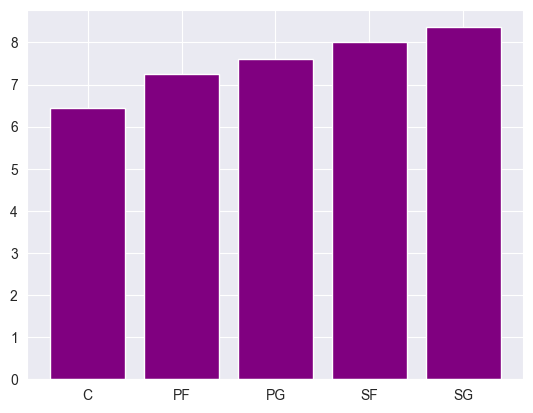

In [18]:
mean_pts_by_pos = plrs.groupby('pos')['pts_per_game'].mean()
x = mean_pts_by_pos.index
y = mean_pts_by_pos.values
plt.bar(x, y, color='purple')


<BarContainer object of 5 artists>

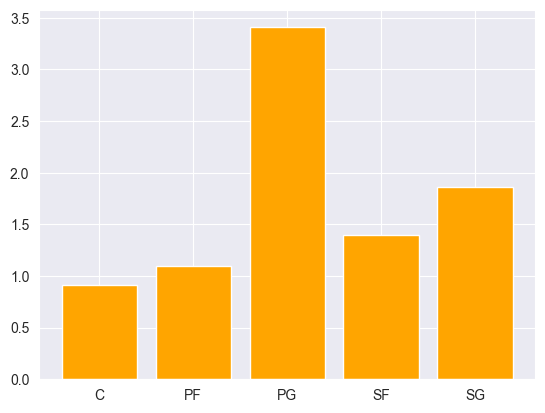

In [19]:
mean_ast_by_pos = plrs.groupby('pos')['ast_per_game'].mean()
x = mean_ast_by_pos.index
y = mean_ast_by_pos.values
plt.bar(x, y, color = 'orange')

<BarContainer object of 5 artists>

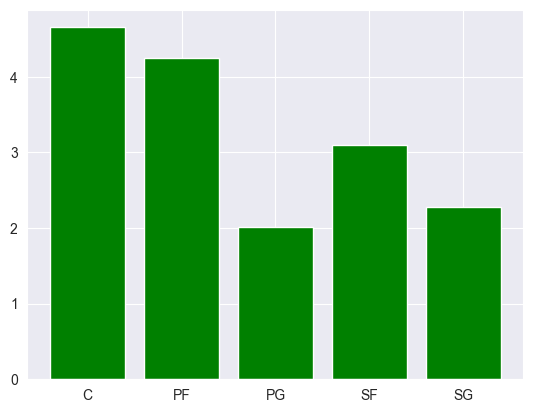

In [20]:
mean_reb_by_pos = plrs.groupby('pos')['trb_per_game'].mean()
x = mean_reb_by_pos.index
y = mean_reb_by_pos.values
plt.bar(x, y, color = 'green')